## Computing Vanishing Points

- authors: Le Thi Hoa - Tran Hai Linh

- Vanishing points are crucial concepts in projective geometry and computer vision, particularly when analyzing perspective in images. They play a significant role in understanding the convergence of parallel lines in three-dimensional space when projected onto a two-dimensional image

## Import required libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Canny Edge Detection: 
- To create an image with clear edges, we use the Canny Edge Detection algorithm. This helps us accurately identify edges in the image.


In [2]:
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, low_threshold, high_threshold)
    return edges

### Hough Transform
- Next, we employ the Hough Transform to detect lines in the image. These lines correspond to edges and objects in 3D space.

In [3]:
def hough_transform(image, rho, theta, threshold):
    # Perform Hough Transform to detect lines
    lines = cv2.HoughLines(image, rho, theta, threshold)

    # Convert polar coordinates to Cartesian coordinates
    cart_lines = []
    for line in lines:
        rho, theta = line[0]
        if np.sin(theta) != 0:  # Avoid division by zero
            m = -1 / np.tan(theta)
            b = rho / np.sin(theta)
            cart_lines.append((m, b))

    return cart_lines


### Finding Vanishing Points
- We compute vanishing points by finding the intersection of the detected lines. This is achieved through solving a system of linear equations.

In [4]:
def find_intersection_points(lines):
    # Find intersection points of lines
    vp = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            m1, b1 = lines[i]
            m2, b2 = lines[j]
            if abs(m1 - m2) > 1e-6:
                x0 = (b2 - b1) / (m1 - m2)
                y0 = m1 * x0 + b1
                if not np.isnan(x0) and not np.isnan(y0):
                    x0, y0 = int(np.round(x0)), int(np.round(y0))
                    vp.append((x0, y0))
    return vp


### Displaying Results
- Finally, we showcase the results by drawing the detected lines and vanishing points on the image.

In [5]:
def plot_lines_and_points(image, lines, points):
    # Plot the lines on the image
    for line in lines:
        m, b = line
        x1 = 0
        y1 = int(b)
        x2 = image.shape[1]
        y2 = int(m * x2 + b)
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)

    # Plot the intersection points on the image
    for p in points:
        cv2.circle(image, p, 5, (255, 0, 0), -1)

    # Display the image using matplotlib
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Vanishing Points Detection')
    plt.axis('off')
    plt.show()


### Create function computing vanishing points

In [6]:
def detect_vanishing_points(image_path, low_threshold=50, high_threshold=150, rho=1, theta=np.pi/180, threshold=100):
    # Load the image
    img = cv2.imread(image_path)

    # Apply Canny edge detection
    edges = canny_edge_detection(img, low_threshold, high_threshold)

    # Perform Hough Transform to detect lines
    lines = hough_transform(edges, rho, theta, threshold)

    # Find intersection points of lines
    vp = find_intersection_points(lines)

    # Plot the lines and intersection points on the image
    plot_lines_and_points(img, lines, vp)


### Perform

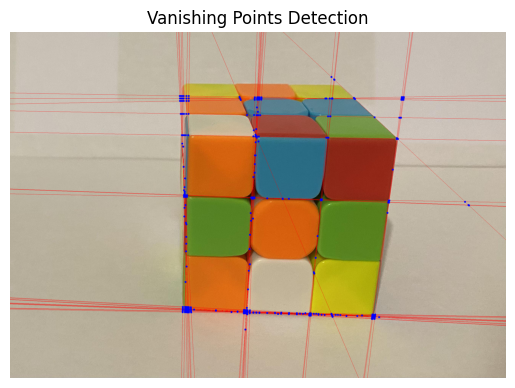

In [7]:
detect_vanishing_points("input/img1.jpeg")

- **For this case, we have one vanishing point**

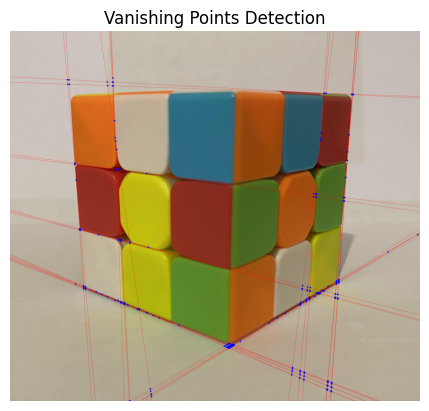

In [8]:
detect_vanishing_points("input/img3.jpeg")

- **And this case, we have two vanishing points**

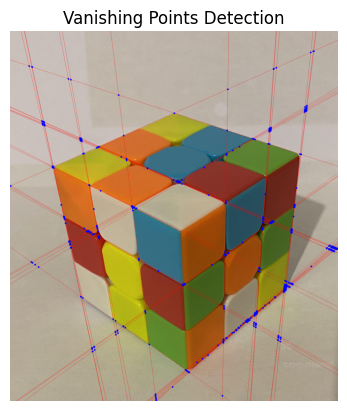

In [9]:
detect_vanishing_points("input/img2.jpeg")

- **And this case, we have three vanishing points**

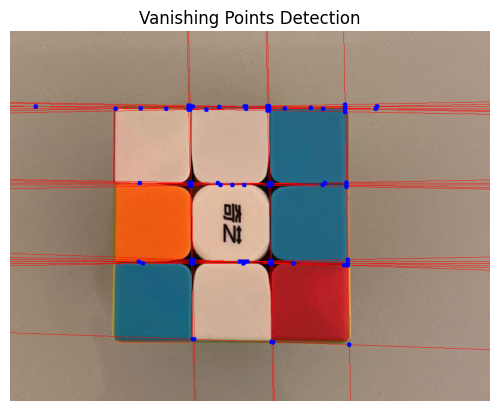

In [10]:
detect_vanishing_points("input/img4.png")

## Conclusion: Answering Questions

### 1. What is the minimum and maximum number of finite vanishing points that can be found from all possible images of a Rubik’s cube? Explain.
- **Minimum Number of Vanishing Points**: Minimum Number of Vanishing Points: The minimum number of vanishing points that can be found in images of a Rubik's Cube is zero. The cube is photographed directly face-on, so all its sides are parallel to the image plane. No parallel lines converge; they remain parallel as they recede into the distance. This occurs in the case of an orthographic projection, where all the lines on the Rubik's Cube are represented as parallel and do not converge at any point. Orthographic projection is used to represent objects without distortion due to perspective, and all dimensions of the object are maintained in proportion. 
- **Maximum Number of Vanishing Points:** The maximum number of vanishing points in images of a Rubik's Cube is three. This occurs in the case of a three-point perspective, where each face of the Rubik's Cube faces towards a separate vanishing point. In a three-point perspective, the Rubik's Cube is often viewed from an angle where all three faces are visible, and each face points in a different direction, resulting in three vanishing points.
- Thus, in all possible images of a Rubik's Cube, the minimum number of vanishing points is zero (in orthographic projection), and the maximum number is three (in three-point perspective).


### 2. Is there a relation between number of visible faces and vanishing points? Explain with reasoning and experiments.
- Yes, there is a relationship between the number of visible faces of a Rubik's Cube (or any cubic object) and the number of vanishing points in a perspective drawing. This relationship is governed by the principles of perspective in drawing and visualization.
- **Understanding the Rubik's Cube and Perspective:**
    - **Rubik's Cube Structure**: A Rubik's Cube is a cube-shaped puzzle consisting of smaller cubelets. As a cubic object, it has six faces, but in any given orientation, a maximum of three faces can be visible to the observer.

    - **Vanishing Points**: Vanishing points are where parallel lines appear to converge in a drawing, creating the illusion of depth and perspective. The number of vanishing points corresponds to the perspective type: one-point, two-point, or three-point perspective.
- **Relationship Between Visible Faces and Vanishing Points**
    - **One-Point Perspective**: 
        - **Description**: Here, there's a single vanishing point. This perspective is used for objects directly facing the viewer.
        - **Rubik's Cube Visibility**: In a one-point perspective, you typically see only one face of the Rubik's Cube fully, with slight parts of the adjacent faces depending on the cube's tilt and the observer's angle.
   
    - **Two-Point Perspective**: 
        - **Description**: This perspective uses two vanishing points, usually for objects at an angle to the viewer.
        - **Rubik's Cube Visibility**: You can usually see two or three faces of the Rubik's Cube in this perspective. The cube's orientation will determine how much of each face is visible.

    - **Three-Point Perspective**: 
        - **Description**: Involves three vanishing points and is often used for dramatic or high/low angle views.
        - **Rubik's Cube Visibility**: All three visible faces of the Rubik's Cube can be depicted with some level of distortion due to the perspective, especially if the viewpoint is from above or below.

- **Experimental Observation: To experiment and observe this relationship:**

    - One-Point Perspective Drawing: Draw a Rubik's Cube facing you directly. Notice how the sides recede towards a single point. Observe the visibility of the faces.

    - Two-Point Perspective Drawing: Draw the Rubik's Cube at an angle. Use two vanishing points on the horizon line. You'll see two or possibly three faces, depending on the cube’s tilt and angle.

    - Three-Point Perspective Drawing: Draw the Rubik's Cube from a bird's eye or worm's eye view, adding a third vanishing point above or below. All three faces can be visible, with varying degrees of distortion.

**Conclusion**
- In conclusion, the number of visible faces of a Rubik's Cube in a drawing is directly related to the number of vanishing points used in the perspective. One-point perspective typically shows one or two faces, two-point perspective can show two or three faces, and three-point perspective can show all three visible faces, albeit with perspective distortion. This relationship is essential for accurately representing cubic objects like a Rubik's Cube in drawings and art.








### 3. Can you find 4 vanishing points in Rubik’s cube images? If yes, demonstrate with an image. If no, explain your reasoning.
- No, It is not possible to find 4 vanishing points in the image of the Rubik's Cube. Let's consider the fundamental principles of perspective and the number of vanishing points that can appear in an image.
- **Fundamental Principles of Perspective:** 
    - In a perspective image, for a three-dimensional object like a Rubik's Cube, parallel lines in the real world will converge at a vanishing point in the image.
    - The maximum number of vanishing points we can have depends on the type of perspective: one point, two points, or three points.
- **Rubik's Cube and Number of Faces:**
    - A Rubik's Cube has six faces, and each face can correspond to a vanishing point.
    - In the case of one-point perspective, we only see one face of the Rubik's Cube.
    - In two-point perspective, we may see two or three faces, depending on the viewing angle and orientation of the Rubik's Cube.
    - In three-point perspective, we can see all three faces, but with some distortion due to the perspective.
- **Cannot Have 4 Vanishing Points:**
    - Because a Rubik's Cube has only six faces, it is not possible to generate more than three vanishing points in an image without compromising the accuracy of the perspective.
    -If there were four vanishing points, it would result in an image that cannot accurately retain the distinctive features and angles of the Rubik's Cube.
- Therefore, based on the fundamental principles of perspective and the structure of the Rubik's Cube, it is not possible to find 4 vanishing points without sacrificing the accuracy of representing the Rubik's Cube image.

### 4. Can you find a configuration with at least one vanishing point outside the image? If yes, demonstrate with an image. If no, explain your reasoning.
- Yes, it's common for vanishing points to lie outside the actual image frame, especially in pictures with a wide-angle view or when the object is very close to the lens. The lines will appear to converge at a point beyond the borders of the image.

